In [49]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm
from shapely.geometry import box

path_to_analysis = "../../../analysis/"

# Abstract

The goal of this notebook is to visualize the data that we need for the simulation, and the data that we obtain from the simulation. 

In [50]:
# Load the data
population = pd.read_csv(path_to_analysis + "population.csv", sep=";")
network = gpd.read_file(path_to_analysis + "network.gpkg")
activities = gpd.read_file(path_to_analysis + "activities/activities.shp")

In [51]:
# Print basic information
print("Population Data:")
print(f"Number of records: {len(population)}")
print(f"Columns: {population.columns.tolist()}")
population.head()

Population Data:
Number of records: 4292
Columns: ['person_id', 'age', 'bikeAvailability', 'carAvailability', 'censusHouseholdId', 'censusPersonId', 'employed', 'hasLicense', 'hasPtSubscription', 'householdId', 'householdIncome', 'htsHouseholdId', 'htsPersonId', 'isOutside', 'isPassenger', 'sex']


,person_id,age,bikeAvailability,carAvailability,censusHouseholdId,censusPersonId,employed,hasLicense,hasPtSubscription,householdId,householdIncome,htsHouseholdId,htsPersonId,isOutside,isPassenger,sex
0,10012156,36,all,all,1612793,3631212,True,yes,True,4440083,2299.690130,805,1616,True,False,f
1,10012879,45,none,some,1612873,3631416,True,yes,False,4440362,351.017365,3409,7917,True,False,m
2,10019087,39,none,all,1613555,3633176,True,yes,False,4442780,1392.941352,1321,2655,True,False,m
3,10032590,24,all,some,1615103,3637093,False,yes,False,4448046,7331.739522,6133,14970,True,True,f
4,10036048,48,some,all,1615462,3638040,True,yes,False,4449344,2669.162060,4717,11250,True,False,m


In [52]:
print("Network Data:")
print(f"Number of features: {len(network)}")
print(f"CRS: {network.crs}")
network.head()

Network Data:
Number of features: 28384
CRS: EPSG:32633


,link,from,to,osm,lanes,capacity,freespeed,geometry
0,pt_IDFM:463637_375150,pt_IDFM:463637,249742235,NaN,1,9999.0,9.0,"LINESTRING (658414.000 6858068.005, 657550.824..."
1,pt_IDFM:463637,pt_IDFM:463637,pt_IDFM:463637,NaN,1,7999.2,inf,"LINESTRING (658414.000 6858068.005, 658414.000..."
2,pt_IDFM:419004_200246,pt_IDFM:419004,267565737,NaN,1,7999.2,17.0,"LINESTRING (660001.000 6859444.005, 660436.158..."
3,pt_IDFM:419004,pt_IDFM:419004,pt_IDFM:419004,NaN,1,7999.2,inf,"LINESTRING (660001.000 6859444.005, 660001.000..."
4,pt_IDFM:27331_642749,pt_IDFM:27331,5059182780,NaN,1,7999.2,8.0,"LINESTRING (651465.000 6862315.005, 651756.446..."


## Make conclusions

Das interessante für uns, woraus wir Conclusions ziehen, ist das Activity File. 

In [53]:
print("Activities Data:")
print(f"Number of features: {len(activities)}")
print(f"CRS: {activities.crs}")
activities.head(50)

Activities Data:
Number of features: 39195
CRS: EPSG:32633


,personId,activityIn,type,linkId,facilityId,startTime,endTime,geometry
0,8543720,NaN,outside,66857,outside_34,NaN,78815.0,POINT (659868.736 6857568.344)
1,8543720,NaN,outside,38045,outside_22,NaN,20576.0,POINT (650493.325 6857952.579)
2,847828,NaN,outside,23104,outside_325,NaN,56940.0,POINT (648996.233 6858845.328)
3,7326648,NaN,pt interaction,pt_IDFM:22119,NaN,NaN,NaN,POINT (653096.000 6865120.005)
4,7326648,NaN,pt interaction,pt_IDFM:463043,NaN,NaN,NaN,POINT (648358.440 6864110.505)
5,7326648,NaN,outside,58142,outside_45,NaN,25830.0,POINT (648302.919 6864042.529)
6,732189,NaN,leisure,301113,sec_392290,74722.0,NaN,POINT (652306.700 6858825.300)
7,732189,NaN,pt interaction,228069,NaN,NaN,NaN,POINT (652336.000 6858605.005)
8,732189,NaN,pt interaction,68070,NaN,NaN,NaN,POINT (648380.000 6859890.005)
9,732189,NaN,home,145015,home_392033,61222.0,72022.0,POINT (648335.310 6859849.570)


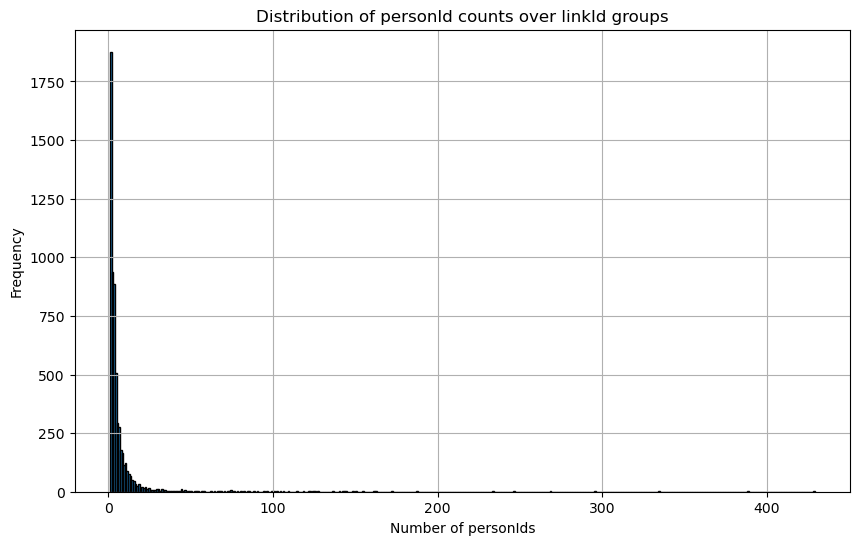

count    6106.000000
mean        6.419096
std        16.529558
min         1.000000
25%         1.000000
50%         3.000000
75%         6.000000
max       428.000000
Name: personId, dtype: float64


In [54]:
# Group by 'linkId'
grouped = activities.groupby('linkId')

# Calculate the count of 'personId' for each 'linkId'
person_count = grouped['personId'].count()

# Plot the distribution
plt.figure(figsize=(10, 6))
person_count.plot(kind='hist', bins=range(person_count.min(), person_count.max() + 2), edgecolor='black')
plt.title('Distribution of personId counts over linkId groups')
plt.xlabel('Number of personIds')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Display summary statistics
summary_statistics = person_count.describe()
print(summary_statistics)


In [55]:
person_count

linkId
100321             7
100371            10
100373             5
100374             1
100517             3
                  ..
pt_IDFM:474397    19
pt_IDFM:480286    13
pt_IDFM:480340    46
pt_IDFM:480541    41
pt_IDFM:480964    12
Name: personId, Length: 6106, dtype: int64

In [56]:
# Group by 'linkId' and count the number of 'personId'
person_count_this = activities.groupby('linkId')['personId'].count().reset_index()
person_count_this.columns = ['link', 'number_of_travelers']

network_with_travelers = network.merge(person_count_this, how='left', left_on='link', right_on='link')

# Fill NaN values in 'number_of_travelers' with 0
network_with_travelers['number_of_travelers'].fillna(0, inplace=True)

In [57]:
network_with_travelers

,link,from,to,osm,lanes,capacity,freespeed,geometry,number_of_travelers
0,pt_IDFM:463637_375150,pt_IDFM:463637,249742235,NaN,1,9999.0,9.000000,"LINESTRING (658414.000 6858068.005, 657550.824...",0.0
1,pt_IDFM:463637,pt_IDFM:463637,pt_IDFM:463637,NaN,1,7999.2,inf,"LINESTRING (658414.000 6858068.005, 658414.000...",0.0
2,pt_IDFM:419004_200246,pt_IDFM:419004,267565737,NaN,1,7999.2,17.000000,"LINESTRING (660001.000 6859444.005, 660436.158...",0.0
3,pt_IDFM:419004,pt_IDFM:419004,pt_IDFM:419004,NaN,1,7999.2,inf,"LINESTRING (660001.000 6859444.005, 660001.000...",2.0
4,pt_IDFM:27331_642749,pt_IDFM:27331,5059182780,NaN,1,7999.2,8.000000,"LINESTRING (651465.000 6862315.005, 651756.446...",0.0
...,...,...,...,...,...,...,...,...,...
28379,100324,24972376,24972375,residential,1,480.0,8.333333,"LINESTRING (651559.387 6861509.945, 651502.714...",0.0
28380,100321,664205947,24972376,residential,2,960.0,8.333333,"LINESTRING (651565.078 6861531.470, 651559.387...",7.0
28381,100317,24983651,5904976363,tertiary,2,960.0,8.333333,"LINESTRING (651475.677 6861563.954, 651477.818...",0.0
28382,100316,5904976363,24983651,tertiary,1,480.0,8.333333,"LINESTRING (651477.818 6861578.659, 651475.677...",0.0


In [58]:
type(network_with_travelers)

geopandas.geodataframe.GeoDataFrame

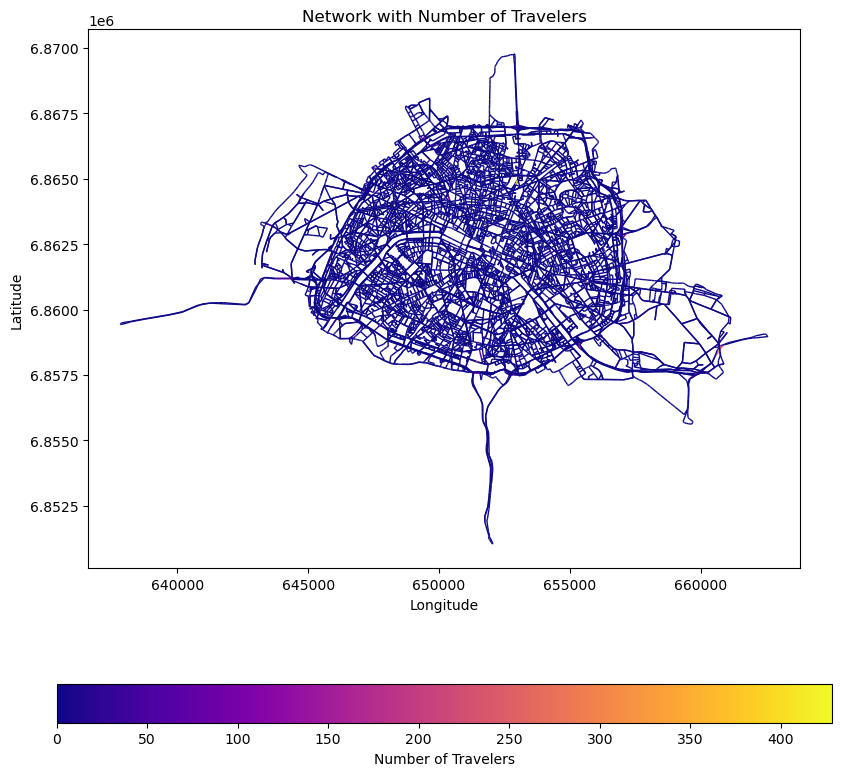

In [59]:
from matplotlib.colors import Normalize
from matplotlib import cm

# network['geometry'] = gpd.GeoSeries.from_wkt(network['geometry'])

# Convert the DataFrame to a GeoDataFrame
# gdf = gpd.GeoDataFrame(network, geometry='geometry')

# Plot the GeoDataFrame
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

norm = mcolors.LogNorm(vmin=network_with_travelers['number_of_travelers'].min(), vmax=network_with_travelers['number_of_travelers'].max())
cmap = cm.viridis

network_with_travelers.plot(column='number_of_travelers', cmap='plasma', linewidth=1, ax=ax, legend=True,
         legend_kwds={'label': "Number of Travelers",
                      'orientation': "horizontal"})

# Adjust the plot appearance
ax.set_title('Network with Number of Travelers')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.savefig("network_with_travelers.png", dpi = 300)
plt.show()

We find the following:

Es gibt 6106 verschiedene Links in diesem Netzwerk, die am ganzen Tag x mal besucht werden. Also nach Trips von Personen. Maximale Anzahl 

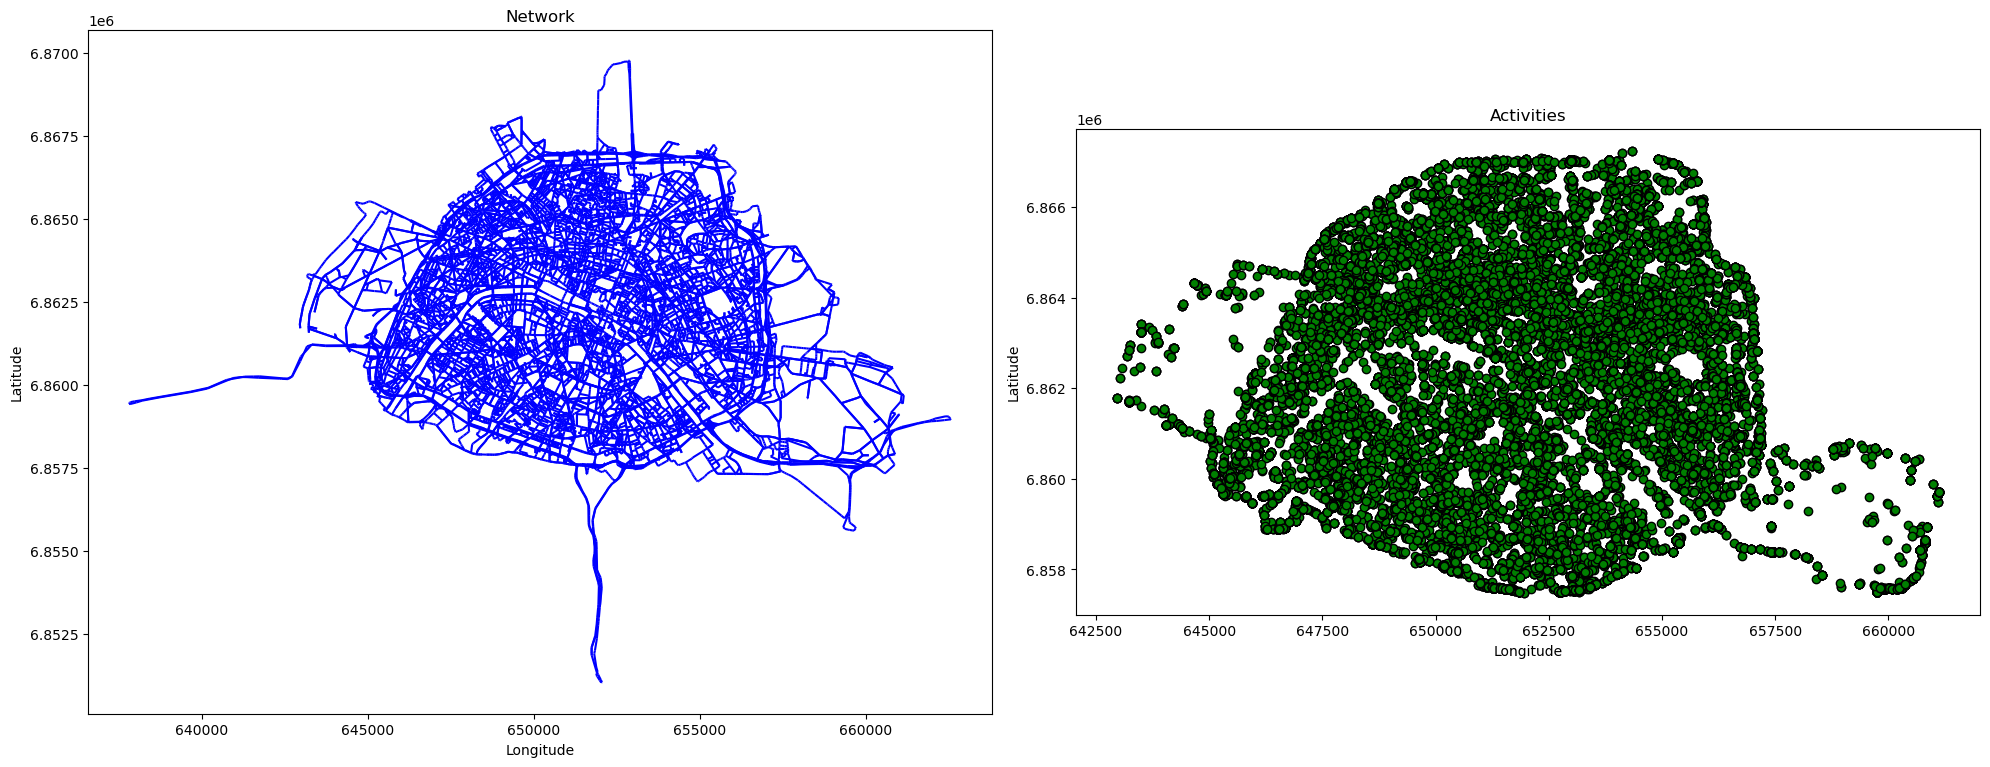

In [60]:
# Visualize the geospatial data
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

network.plot(ax=axes[0], color='blue', edgecolor='black')
axes[0].set_title('Network')
axes[0].set_xlabel('Longitude')
axes[0].set_ylabel('Latitude')

activities.plot(ax=axes[1], color='green', edgecolor='black')
axes[1].set_title('Activities')
axes[1].set_xlabel('Longitude')
axes[1].set_ylabel('Latitude')

plt.tight_layout()
plt.show()

In [61]:

# import matplotlib.colors as mcolors
# import matplotlib.cm as cm

# # Print basic information about the network
# print("Network Data:")
# print(f"Number of features: {len(network)}")
# print(f"CRS: {network.crs}")
# print(network.head())

# # Normalize the capacity values to [0, 1] for colormap
# norm = mcolors.Normalize(vmin=network['capacity'].min(), vmax=network['capacity'].max())

# # Create a colormap
# cmap = cm.viridis

# # Apply the colormap to the capacity values
# network['color'] = network['capacity'].apply(lambda x: cmap(norm(x)))

# # Plot the network with edges colored by capacity
# fig, ax = plt.subplots(figsize=(15, 10))

# # Plot all edges at once
# network.plot(ax=ax, color=network['color'], linewidth=0.5)

# # Add a colorbar
# sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
# sm.set_array([])
# cbar = plt.colorbar(sm, ax=ax)
# cbar.set_label('Capacity')

# # Set titles and labels
# ax.set_title('Network with Edges Colored by Capacity')
# ax.set_xlabel('Longitude')
# ax.set_ylabel('Latitude')

# plt.show()


Network Data:
Number of features: 28384
CRS: EPSG:32633
                    link            from              to  osm  lanes  \
0  pt_IDFM:463637_375150  pt_IDFM:463637       249742235  NaN      1   
1         pt_IDFM:463637  pt_IDFM:463637  pt_IDFM:463637  NaN      1   
2  pt_IDFM:419004_200246  pt_IDFM:419004       267565737  NaN      1   
3         pt_IDFM:419004  pt_IDFM:419004  pt_IDFM:419004  NaN      1   
4   pt_IDFM:27331_642749   pt_IDFM:27331      5059182780  NaN      1   

   capacity  freespeed                                           geometry  
0    9999.0        9.0  LINESTRING (658414.000 6858068.005, 657550.824...  
1    7999.2        inf  LINESTRING (658414.000 6858068.005, 658414.000...  
2    7999.2       17.0  LINESTRING (660001.000 6859444.005, 660436.158...  
3    7999.2        inf  LINESTRING (660001.000 6859444.005, 660001.000...  
4    7999.2        8.0  LINESTRING (651465.000 6862315.005, 651756.446...  


/Users/elenanatterer/anaconda3/envs/Paris_Analysis/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


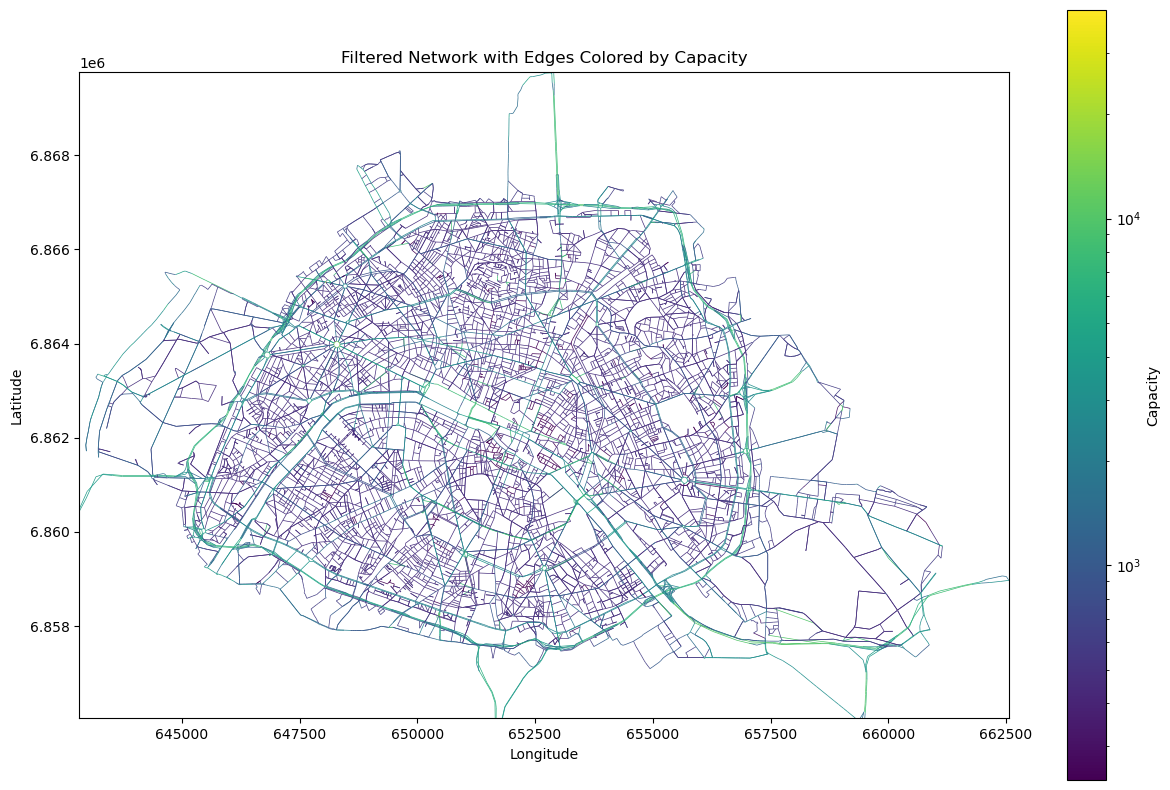

In [62]:


network = gpd.read_file(path_to_analysis + "network.gpkg")

# Print basic information about the network
print("Network Data:")
print(f"Number of features: {len(network)}")
print(f"CRS: {network.crs}")
print(network.head())

x_min = network.total_bounds[0] + 5000
y_min = network.total_bounds[1] + 5000
x_max = network.total_bounds[2] 
y_max = network.total_bounds[3]

# Define the bounding box coordinates
# x_min = 642000
# y_min = 6855000

# Create a bounding box polygon
bbox = box(x_min, y_min, x_max, y_max)

# Filter the network to include only the data within the bounding box
network_filtered = network[network.intersects(bbox)]

# Normalize the capacity values to [0, 1] for colormap
norm = mcolors.LogNorm(vmin=network_filtered['capacity'].min(), vmax=network_filtered['capacity'].max())
# norm = mcolors.Normalize(vmin=network_filtered['capacity'].min(), vmax=10000)

# Create a colormap
cmap = cm.viridis

# Apply the colormap to the capacity values
network_filtered['color'] = network_filtered['capacity'].apply(lambda x: cmap(norm(x)))

# Plot the filtered network with edges colored by capacity
fig, ax = plt.subplots(figsize=(15, 10))

# Plot all edges at once
network_filtered.plot(ax=ax, color=network_filtered['color'], linewidth=0.5)

# Add a colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Capacity')

# Set titles and labels
ax.set_title('Filtered Network with Edges Colored by Capacity')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.show()


/Users/elenanatterer/anaconda3/envs/Paris_Analysis/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


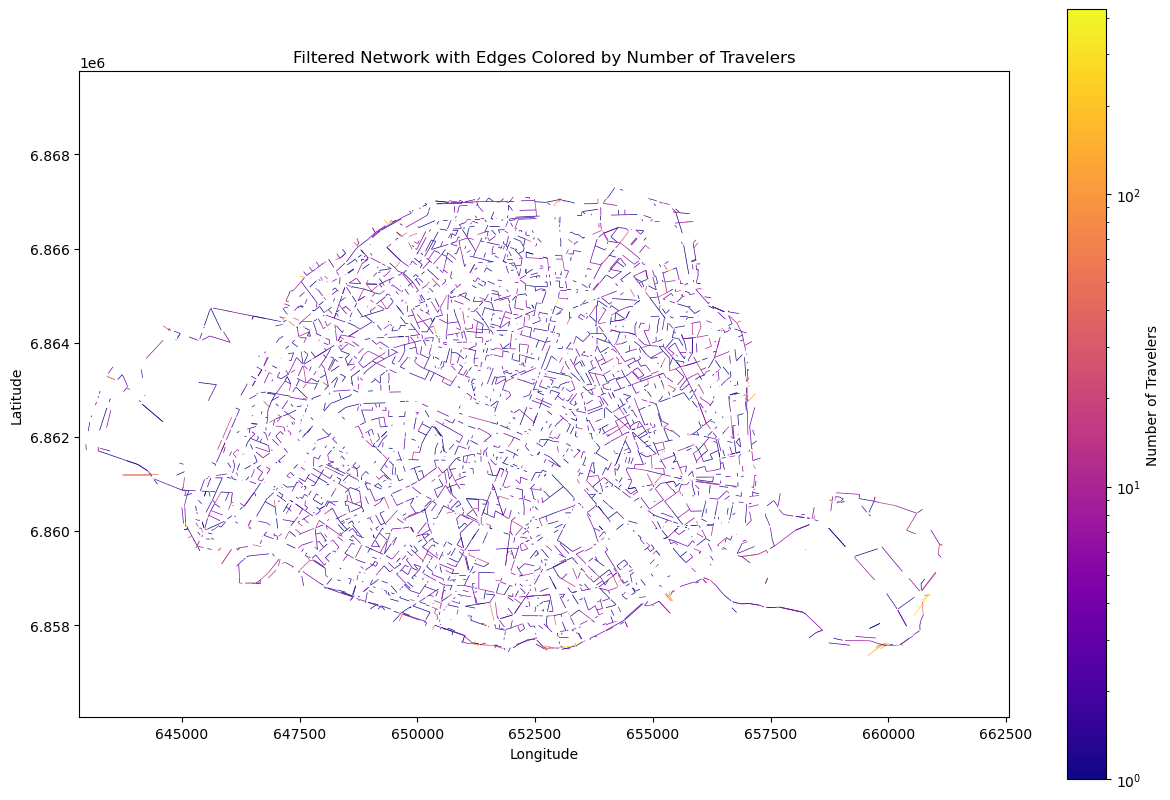

In [72]:
from matplotlib.colors import Normalize, LogNorm

network_2 = network.copy()
network_with_travelers = network_2.merge(person_count_this, how='left', left_on='link', right_on='link')

x_min = network_with_travelers.total_bounds[0] + 5000
y_min = network_with_travelers.total_bounds[1] + 5000
x_max = network_with_travelers.total_bounds[2]
y_max = network_with_travelers.total_bounds[3]

# Create a bounding box polygon
bbox = box(x_min, y_min, x_max, y_max)

# Filter the network to include only the data within the bounding box
network_filtered = network_with_travelers[network_with_travelers.intersects(bbox)]

# Ensure there are no zero values for logarithmic normalization
network_filtered['number_of_travelers'] = network_filtered['number_of_travelers'].replace(0, 1)

# Normalize the number of travelers values to [0, 1] for colormap
norm = LogNorm(vmin=network_filtered['number_of_travelers'].min(), vmax=network_filtered['number_of_travelers'].max())

# Create a colormap
cmap = cm.plasma

# Apply the colormap to the number of travelers values
network_filtered['color'] = network_filtered['number_of_travelers'].apply(lambda x: cmap(norm(x)))

# Plot the filtered network with edges colored by the number of travelers
fig, ax = plt.subplots(figsize=(15, 10))

# Plot all edges at once
network_filtered.plot(ax=ax, color=network_filtered['color'], linewidth=0.5)

# Add a colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Number of Travelers')

# Set titles and labels
ax.set_title('Filtered Network with Edges Colored by Number of Travelers')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.show()

In [69]:
network_filtered['number_of_travelers'].max()

388.0

In [64]:
network_with_travelers

,link,from,to,osm,lanes,capacity,freespeed,geometry,number_of_travelers
0,pt_IDFM:463637_375150,pt_IDFM:463637,249742235,NaN,1,9999.0,9.000000,"LINESTRING (658414.000 6858068.005, 657550.824...",0.0
1,pt_IDFM:463637,pt_IDFM:463637,pt_IDFM:463637,NaN,1,7999.2,inf,"LINESTRING (658414.000 6858068.005, 658414.000...",0.0
2,pt_IDFM:419004_200246,pt_IDFM:419004,267565737,NaN,1,7999.2,17.000000,"LINESTRING (660001.000 6859444.005, 660436.158...",0.0
3,pt_IDFM:419004,pt_IDFM:419004,pt_IDFM:419004,NaN,1,7999.2,inf,"LINESTRING (660001.000 6859444.005, 660001.000...",2.0
4,pt_IDFM:27331_642749,pt_IDFM:27331,5059182780,NaN,1,7999.2,8.000000,"LINESTRING (651465.000 6862315.005, 651756.446...",0.0
...,...,...,...,...,...,...,...,...,...
28379,100324,24972376,24972375,residential,1,480.0,8.333333,"LINESTRING (651559.387 6861509.945, 651502.714...",0.0
28380,100321,664205947,24972376,residential,2,960.0,8.333333,"LINESTRING (651565.078 6861531.470, 651559.387...",7.0
28381,100317,24983651,5904976363,tertiary,2,960.0,8.333333,"LINESTRING (651475.677 6861563.954, 651477.818...",0.0
28382,100316,5904976363,24983651,tertiary,1,480.0,8.333333,"LINESTRING (651477.818 6861578.659, 651475.677...",0.0
